In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split, GridSearchCV  
from IPython.display import Image  
import scipy.stats as stats
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import seaborn as sns
import os


In [2]:
os.chdir('C:\\Users\\kirti\\Downloads')

In [3]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [4]:
df1 = df.copy()

### Solution 1.1 Data Ingestion (Descriptive Statistics & Null Value Conndition Check)


In [5]:
df1.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df1.shape

(1525, 10)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [8]:
df1.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525,NaN,NaN,NaN,763,440.374,1,382,763,1144,1525
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
df1= df1.drop('Unnamed: 0', axis=1)
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [11]:
dups = df1.duplicated()
print('Number of Duplicate rows = %d' % (dups.sum()))
df1[dups]

Number of Duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [12]:
df1 = df1.drop_duplicates()
dups = df1.duplicated()
sum(dups)

0

In [13]:
df1.shape

(1517, 9)

In [14]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

vote
Labour          1057
Conservative     460
Name: vote, dtype: int64


gender
female    808
male      709
Name: gender, dtype: int64




In [15]:
df1['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [16]:
df1.groupby(["vote"]).count()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
Conservative,460,460,460,460,460,460,460,460
Labour,1057,1057,1057,1057,1057,1057,1057,1057


### Solution 1.2 Exploratory Data Analysis

#### Checking for Outliers

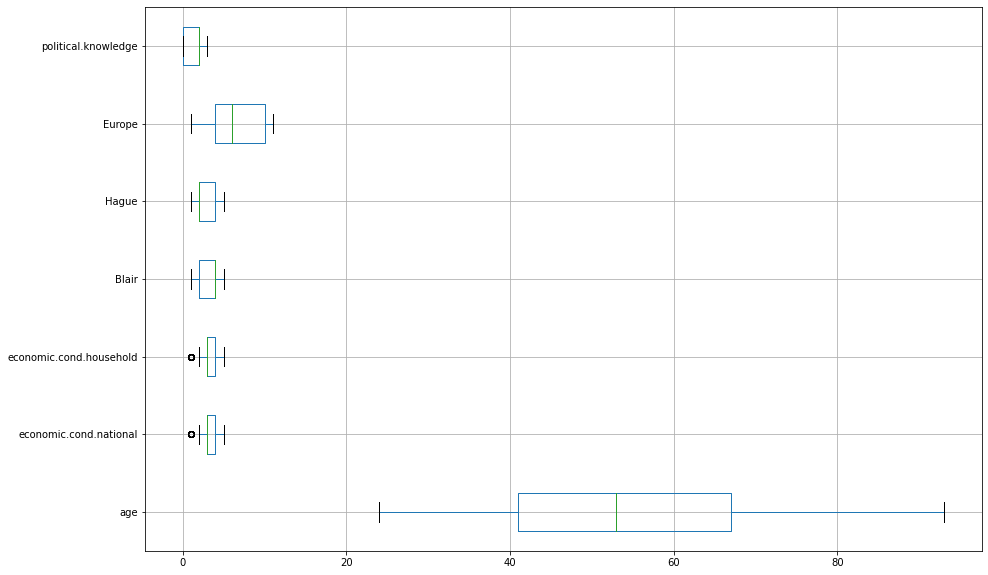

In [17]:
df1.boxplot(vert=0, figsize= '10, 10')

#### Treating the Outliers

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
lr,ur=remove_outlier(df1['economic.cond.household'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['economic.cond.household']=np.where(df1['economic.cond.household']>ur,ur,df1['economic.cond.household'])
df1['economic.cond.household']=np.where(df1['economic.cond.household']<lr,lr,df1['economic.cond.household'])

Lower Range : 1.5 
Upper Range : 5.5


In [20]:
lr,ur=remove_outlier(df1['economic.cond.national'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['economic.cond.national']=np.where(df1['economic.cond.national']>ur,ur,df1['economic.cond.national'])
df1['economic.cond.national']=np.where(df1['economic.cond.national']<lr,lr,df1['economic.cond.national'])

Lower Range : 1.5 
Upper Range : 5.5


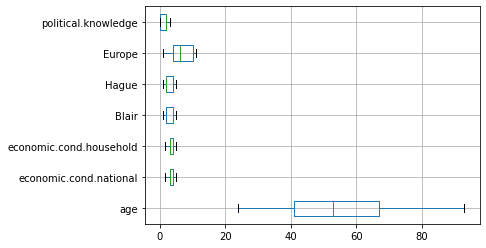

In [21]:
df1.boxplot(vert=0)

### Univariate Analysis

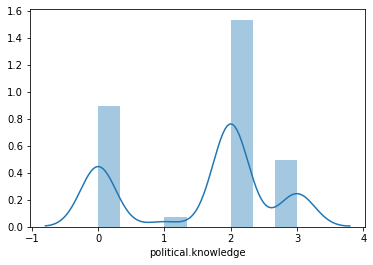

In [22]:
sns.distplot(df1['political.knowledge'])
plt.show()

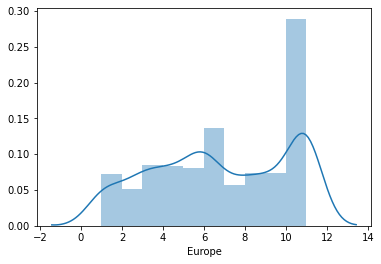

In [23]:
sns.distplot(df1['Europe'])
plt.show()

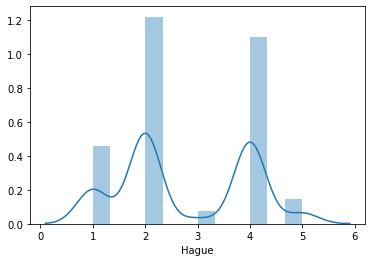

In [24]:
sns.distplot(df1['Hague'])
plt.show()

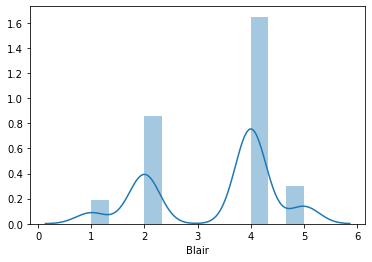

In [25]:
sns.distplot(df1['Blair'])
plt.show()

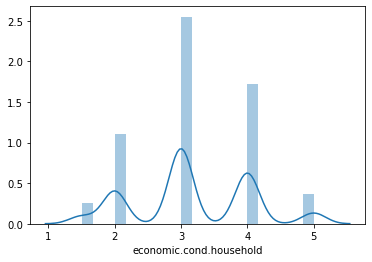

In [26]:
sns.distplot(df1['economic.cond.household'])
plt.show()

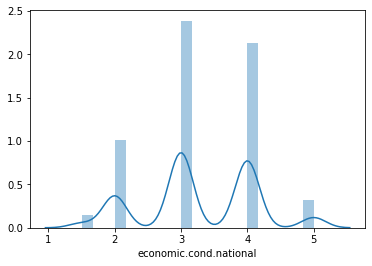

In [27]:
sns.distplot(df1['economic.cond.national'])
plt.show()

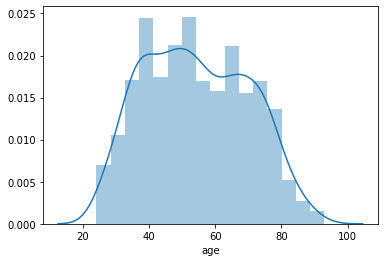

In [28]:
sns.distplot(df1['age'])
plt.show()

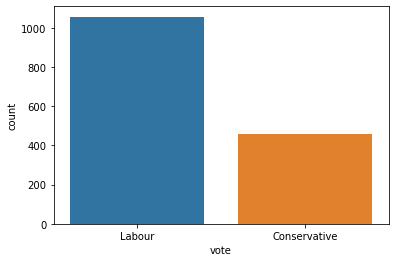

In [29]:
sns.countplot(df1.vote)
plt.show()

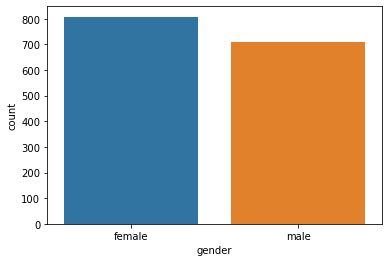

In [30]:
sns.countplot(df1.gender)
plt.show()

### Bivariate & Multivariate Analysis

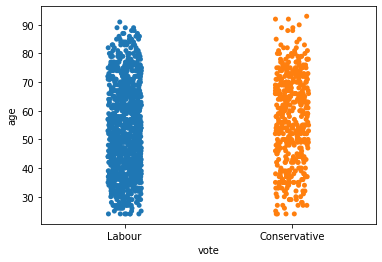

In [31]:
sns.stripplot(df1['vote'], df1['age'])

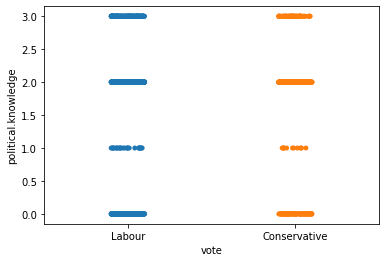

In [32]:
sns.stripplot(df1['vote'], df1['political.knowledge'])

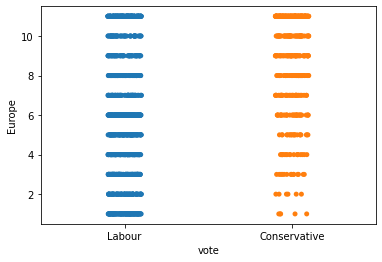

In [33]:
sns.stripplot(df1['vote'], df1['Europe'])

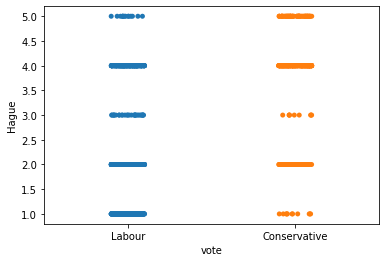

In [34]:
sns.stripplot(df1['vote'], df1['Hague'])

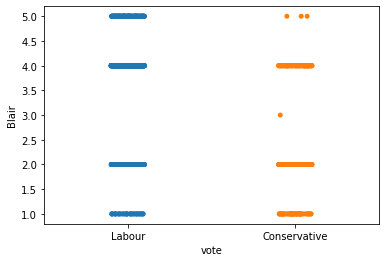

In [35]:
sns.stripplot(df1['vote'], df1['Blair'])

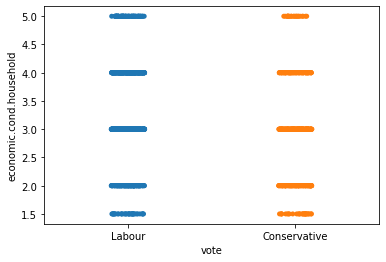

In [36]:
sns.stripplot(df1['vote'], df1['economic.cond.household'])

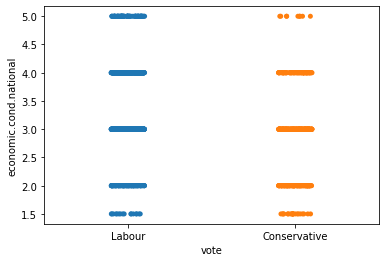

In [37]:
sns.stripplot(df1['vote'], df1['economic.cond.national'])

Text(0, 0.5, 'gender')

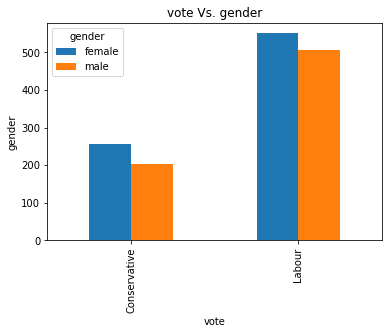

In [38]:
pd.crosstab(df1.vote, df1.gender).plot(kind='bar')
plt.title('vote Vs. gender')
plt.xlabel('vote')
plt.ylabel('gender')

C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\kirti\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


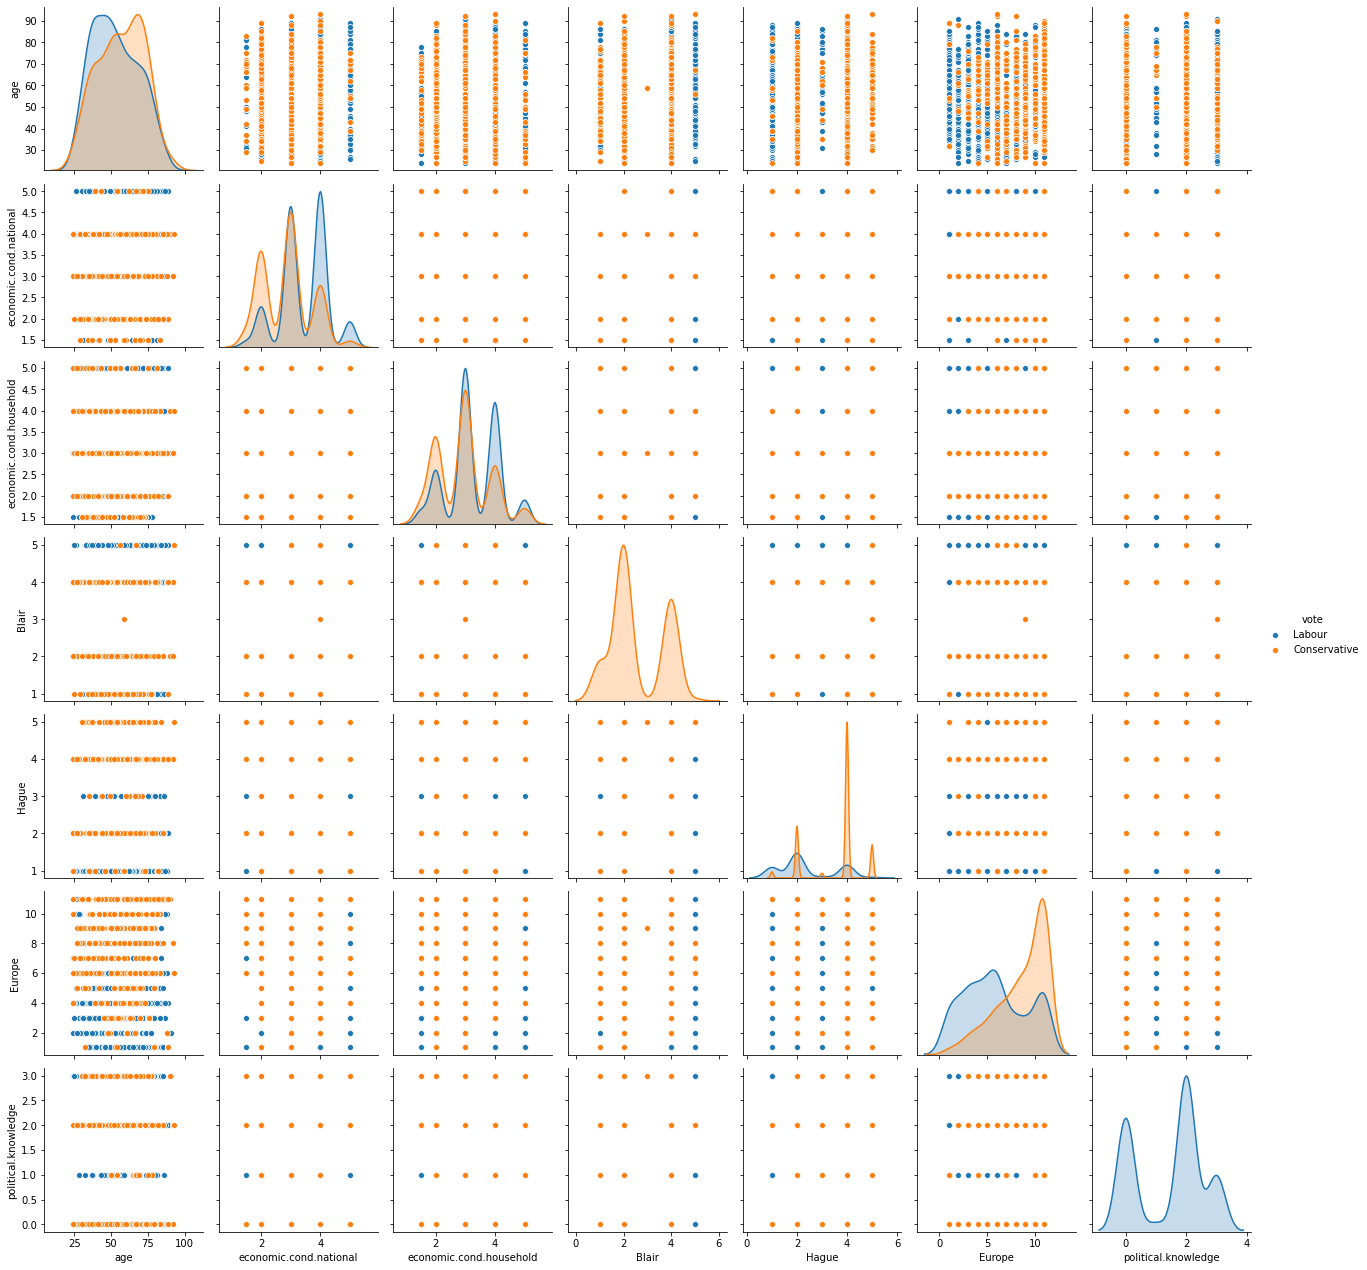

In [39]:
sns.pairplot(df1, hue='vote')

In [40]:
df1.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.022283,-0.044403,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.022283,1.000000,0.344462,0.323603,-0.199175,-0.206605,-0.029273
economic.cond.household,-0.044403,0.344462,1.000000,0.216653,-0.099644,-0.112186,-0.040521
Blair,0.032084,0.323603,0.216653,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.199175,-0.099644,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.206605,-0.112186,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.029273,-0.040521,-0.021299,-0.029906,-0.151197,1.000000


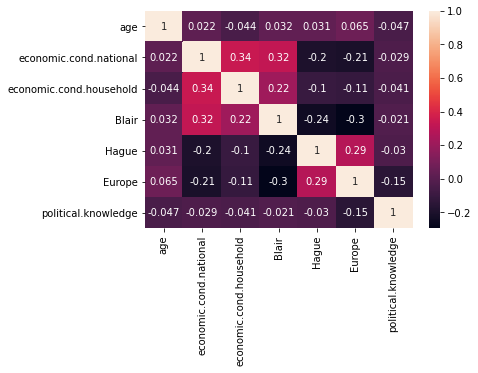

In [41]:
sns.heatmap(df1.corr(), annot=True)

In [42]:
df1.skew()

age                        0.139800
economic.cond.national    -0.069946
economic.cond.household    0.091833
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

###   Encode & Scale the data, Data Split

In [43]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3.0,3.0,4,1,2,2,female
1,Labour,36,4.0,4.0,4,4,5,2,male
2,Labour,35,4.0,4.0,5,2,3,2,male
3,Labour,24,4.0,2.0,2,1,4,0,female
4,Labour,41,2.0,2.0,1,1,6,2,male


In [44]:
df2=df1.copy()

In [45]:
df2.shape

(1517, 9)

In [46]:
#OneHot Encoding
df2 =pd.get_dummies(df2, columns=['gender'],drop_first=True)

In [47]:
df2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3.0,3.0,4,1,2,2,0
1,Labour,36,4.0,4.0,4,4,5,2,1
2,Labour,35,4.0,4.0,5,2,3,2,1
3,Labour,24,4.0,2.0,2,1,4,0,0
4,Labour,41,2.0,2.0,1,1,6,2,1


In [48]:
df2.dtypes

vote                        object
age                          int64
economic.cond.national     float64
economic.cond.household    float64
Blair                        int64
Hague                        int64
Europe                       int64
political.knowledge          int64
gender_male                  uint8
dtype: object

In [49]:
for feature in df2.columns:
    if df2[feature].dtype == 'object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature]=pd.Categorical(df2[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


In [50]:
df2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3.0,3.0,4,1,2,2,0
1,1,36,4.0,4.0,4,4,5,2,1
2,1,35,4.0,4.0,5,2,3,2,1
3,1,24,4.0,2.0,2,1,4,0,0
4,1,41,2.0,2.0,1,1,6,2,1


#### Scaling the data & Split the data into train and test (70:30)

In [51]:
X = df2.drop("vote", axis = 1)
y = df2["vote"]
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
2,35,4.0,4.0,5,2,3,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1


In [52]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [53]:
X['age']= std_scale.fit_transform(X[['age']])
X['economic.cond.national']= std_scale.fit_transform(X[['economic.cond.national']])
X['economic.cond.household']= std_scale.fit_transform(X[['economic.cond.household']])
X['Blair']= std_scale.fit_transform(X[['Blair']])
X['Hague']= std_scale.fit_transform(X[['Hague']])
X['Europe']= std_scale.fit_transform(X[['Europe']])
X['political.knowledge']= std_scale.fit_transform(X[['political.knowledge']])

In [54]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1


In [55]:
#Split the Data into train & test dataset(70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1061, 8)
(456, 8)
(1061,)
(456,)


### Solution 1.4: Apply Logistic Regression and LDA & Solution 1.7: Performance Metrics of the Model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Logistic Regression

In [58]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [59]:
ytrain_pred = LR_model.predict(X_train)
ytest_pred = LR_model.predict(X_test)

In [60]:
ytrain_proba = LR_model.predict_proba(X_train)
ytest_proba = LR_model.predict_proba(X_test)
pd.DataFrame(ytest_proba).head()

,0,1
0,0.425608,0.574392
1,0.153480,0.846520
2,0.006776,0.993224
3,0.839180,0.160820
4,0.065031,0.934969


In [61]:
#Accuracy on Training Dataset
LR_train_score = LR_model.score(X_train, y_train)
print('Accuracy Score is ',LR_train_score)

Accuracy Score is  0.8341187558906692


In [62]:
# Accuracy - Test Data
LR_test_score = LR_model.score(X_test, y_test)
print('Accuracy Score is ',LR_test_score)

Accuracy Score is  0.8289473684210527


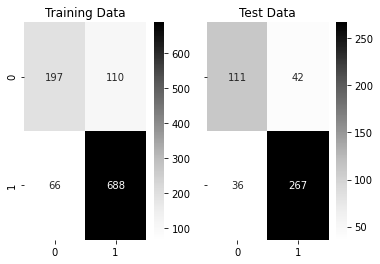

In [63]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [64]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_pred), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [65]:
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


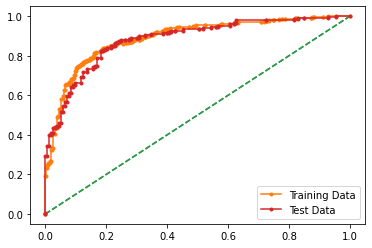

In [67]:
# AUC and ROC for the training data

# calculate AUC
LR_train_auc = metrics.roc_auc_score(y_train,ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % LR_train_auc)

#  calculate roc curve
LR_fpr_train, LR_tpr_train, thresholds = metrics.roc_curve(y_train,ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_fpr_train, LR_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LR_test_auc = metrics.roc_auc_score(y_test,ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % LR_test_auc)

#  calculate roc curve
LR_fpr_test, LR_tpr_test, thresholds = metrics.roc_curve(y_test,ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_fpr_test, LR_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [68]:
LR_metrics=classification_report(y_train,ytrain_pred,output_dict=True)
dfm=pd.DataFrame(LR_metrics).transpose()
LR_train_f1=round(dfm.loc["1"][2],2)
LR_train_recall=round(dfm.loc["1"][1],2)
LR_train_precision=round(dfm.loc["1"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.86
LR_train_recall  0.91
LR_train_f1  0.89


In [69]:
LR_metrics=classification_report(y_test, ytest_pred,output_dict=True)
dfm=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(dfm.loc["1"][0],2)
LR_test_recall=round(dfm.loc["1"][1],2)
LR_test_f1=round(dfm.loc["1"][2],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.86
LR_test_recall  0.88
LR_test_f1  0.87


#### Linear Discriminant Analysis or LDA

In [70]:
LDA = LinearDiscriminantAnalysis()
LDA_model=LDA.fit(X_train,y_train)

In [71]:
ytrain_pred_LDA = LDA_model.predict(X_train)
ytest_pred_LDA = LDA_model.predict(X_test)

In [72]:
ytrain_proba_LDA = LDA_model.predict_proba(X_train)
ytest_proba_LDA = LDA_model.predict_proba(X_test)

In [73]:
pd.DataFrame(ytest_proba_LDA).head()

,0,1
0,0.465970,0.534030
1,0.137501,0.862499
2,0.005997,0.994003
3,0.866101,0.133899
4,0.053663,0.946337


In [74]:
# Accuracy - Training Data
LDA_train_score = LDA_model.score(X_train, y_train)
print('Accuracy Score is ',LDA_train_score)

Accuracy Score is  0.8341187558906692


In [75]:
# Accuracy - Test Data
LDA_test_score = LDA_model.score(X_test, y_test)
print('Accuracy Score is ',LDA_test_score)

Accuracy Score is  0.831140350877193


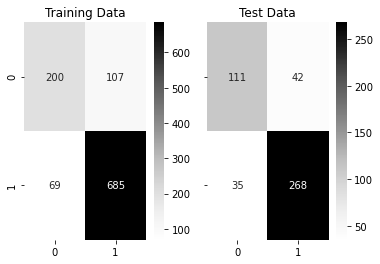

In [76]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_pred_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_pred_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [77]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_pred_LDA), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [78]:
print('Classification Report of the test data:\n\n',classification_report(y_test,ytest_pred_LDA),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


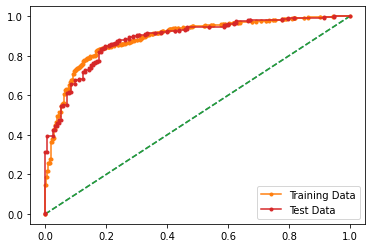

In [80]:
# AUC and ROC for the training data

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(y_train,ytrain_proba_LDA[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_fpr_train, LDA_tpr_train, thresholds = metrics.roc_curve(y_train,ytrain_proba_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_train, LDA_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(y_test,ytest_proba_LDA[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_fpr_test, LDA_tpr_test, thresholds = metrics.roc_curve(y_test,ytest_proba_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_test, LDA_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [81]:
LDA_metrics=classification_report(y_train,ytrain_pred_LDA,output_dict=True)
dfm=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(dfm.loc["1"][2],2)
LDA_train_recall=round(dfm.loc["1"][1],2)
LDA_train_precision=round(dfm.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.86
LDA_train_recall  0.91
LDA_train_f1  0.89


In [82]:
LDA_metrics=classification_report(y_test, ytest_pred_LDA,output_dict=True)
dfm=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(dfm.loc["1"][0],2)
LDA_test_recall=round(dfm.loc["1"][1],2)
LDA_test_f1=round(dfm.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.86
LDA_test_recall  0.88
LDA_test_f1  0.87


### Solution 1.5: Apply KNN Model and Naïve Bayes Model & Solution 1.7: Performance Metrics of the Model

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#### KNN Model

In [84]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [85]:
## Performance Matrix on train data set
KNN_ytrain_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
print(KNN_train_score)

print(metrics.classification_report(y_train, KNN_ytrain_predict))

0.8567389255419415
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [86]:
## Performance Matrix on test data set
KNN_ytest_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
print(KNN_test_score)

print(metrics.classification_report(y_test, KNN_ytest_predict))

0.8267543859649122
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       153
           1       0.85      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.82       456



In [87]:
KNN_ytrain_proba = KNN_model.predict_proba(X_train)
KNN_ytest_proba = KNN_model.predict_proba(X_test)

In [88]:
pd.DataFrame(KNN_ytest_proba).head()

,0,1
0,1.0,0.0
1,0.2,0.8
2,0.0,1.0
3,0.8,0.2
4,0.0,1.0


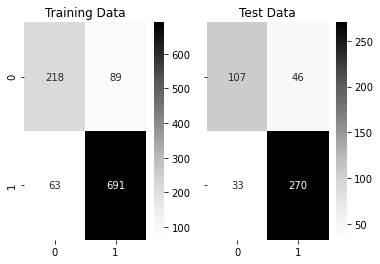

In [89]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,KNN_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,KNN_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.929
AUC for the Test Data: 0.878


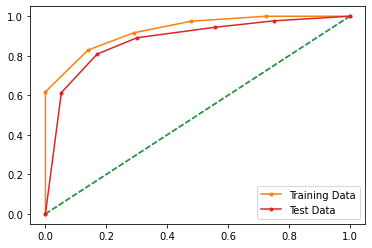

In [91]:
# AUC and ROC for the training data

# calculate AUC
KNN_train_auc = metrics.roc_auc_score(y_train,KNN_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % KNN_train_auc)

#  calculate roc curve
KNN_fpr_train, KNN_tpr_train, thresholds = metrics.roc_curve(y_train,KNN_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_fpr_train, KNN_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
KNN_test_auc = metrics.roc_auc_score(y_test,KNN_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % KNN_test_auc)

#  calculate roc curve
KNN_fpr_test, KNN_tpr_test, thresholds = metrics.roc_curve(y_test,KNN_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_fpr_test, KNN_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [92]:
KNN_metrics=classification_report(y_train,KNN_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(dfm.loc["1"][2],2)
KNN_train_recall=round(dfm.loc["1"][1],2)
KNN_train_precision=round(dfm.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.89
KNN_train_recall  0.92
KNN_train_f1  0.9


In [93]:
KNN_metrics=classification_report(y_test, KNN_ytest_predict,output_dict=True)
dfm=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(dfm.loc["1"][0],2)
KNN_test_recall=round(dfm.loc["1"][1],2)
KNN_test_f1=round(dfm.loc["1"][2],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.85
KNN_test_recall  0.89
KNN_test_f1  0.87


#### **Gaussian Naive Bayes Model**

In [94]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [95]:
##Performance Matrix on Training Dataset
NB_ytrain_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(NB_train_score)

print(metrics.classification_report(y_train, NB_ytrain_predict))     ## classification_report

0.8341187558906692
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [96]:
## Performance Matrix on test data set
NB_ytest_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(NB_test_score)

print(metrics.classification_report(y_test, NB_ytest_predict))    ## classification_report

0.8223684210526315
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [97]:
NB_ytrain_proba = NB_model.predict_proba(X_train)
NB_ytest_proba = NB_model.predict_proba(X_test)

In [98]:
pd.DataFrame(NB_ytest_proba).head()

,0,1
0,0.553915,0.446085
1,0.131740,0.868260
2,0.000247,0.999753
3,0.947290,0.052710
4,0.030269,0.969731


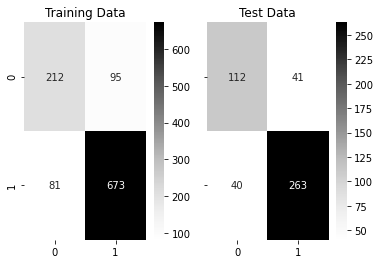

In [99]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,NB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,NB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [100]:
NB_metrics=classification_report(y_train,NB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(dfm.loc["1"][2],2)
NB_train_recall=round(dfm.loc["1"][1],2)
NB_train_precision=round(dfm.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.88
NB_train_recall  0.89
NB_train_f1  0.88


In [101]:
NB_metrics=classification_report(y_test, NB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(KNN_metrics).transpose()
NB_test_precision=round(dfm.loc["1"][0],2)
NB_test_recall=round(dfm.loc["1"][1],2)
NB_test_f1=round(dfm.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.85
NB_test_recall  0.89
NB_test_f1  0.87


AUC for the Training Data: 0.889
AUC for the Test Data: 0.876


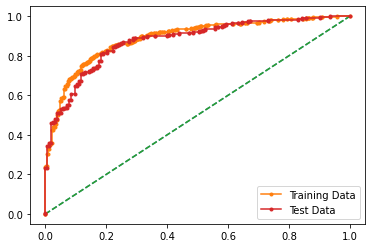

In [102]:
# AUC and ROC for the training data

# calculate AUC
NB_train_auc = metrics.roc_auc_score(y_train,NB_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % NB_train_auc)

#  calculate roc curve
NB_fpr_train, NB_tpr_train, thresholds = metrics.roc_curve(y_train,NB_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_fpr_train, NB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
NB_test_auc = metrics.roc_auc_score(y_test,NB_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % NB_test_auc)

#  calculate roc curve
NB_fpr_test, NB_tpr_test, thresholds = metrics.roc_curve(y_test,NB_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_fpr_test, NB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Solution 1.6: Model Tuning, Bagging and Boosting 

#### Model Tuning

#### Model Tuning for Logistic Regression

In [103]:
grid={'penalty':['l2','none'],
     'solver':['sag','lbfgs','newton-cg'],
     'tol':[0.1, 0.01, 0.001, 0.0001, 0.00001]}

In [104]:
LRG_model=LogisticRegression()


In [105]:
LR_grid = GridSearchCV(estimator = LRG_model, param_grid = grid, cv=5)

In [106]:
LR_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]})

In [107]:
print(LR_grid.best_params_,'\n')
print(LR_grid.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.01} 

LogisticRegression(solver='sag', tol=0.01)


In [108]:
LRbest_model = LR_grid.best_estimator_

In [109]:
#Prediction on the Training Set & Test Data Set
LRB_ytrain_predict = LRbest_model.predict(X_train)
LRB_ytest_predict = LRbest_model.predict(X_test)

In [110]:
## Getting the probabilites on the test set
LRB_ytest_prob=LRbest_model.predict_proba(X_test)
LRB_ytrain_prob=LRbest_model.predict_proba(X_train)
pd.DataFrame(LRB_ytest_prob).head()

,0,1
0,0.429258,0.570742
1,0.154492,0.845508
2,0.006816,0.993184
3,0.840628,0.159372
4,0.064807,0.935193


In [111]:
# Accuracy - Training Data
LRB_train_score = LRbest_model.score(X_train, y_train)
print('Accuracy Score is ',LRB_train_score)

Accuracy Score is  0.8341187558906692


In [112]:
# Accuracy - Test Data
LRB_test_score = LRbest_model.score(X_test, y_test)
print('Accuracy Score is ',LRB_test_score)

Accuracy Score is  0.8289473684210527


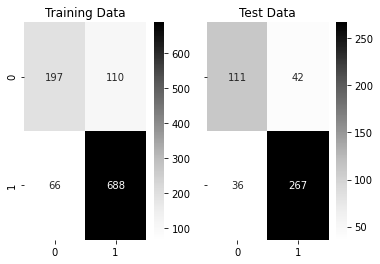

In [113]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,LRB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,LRB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [114]:
print('Classification Report of the training data:\n\n',classification_report(y_train, LRB_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [115]:
print('Classification Report of the test data:\n\n',classification_report(y_test,LRB_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [116]:
LRB_metrics=classification_report(y_train,LRB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(LRB_metrics).transpose()
LRB_train_f1=round(dfm.loc["1"][2],2)
LRB_train_recall=round(dfm.loc["1"][1],2)
LRB_train_precision=round(dfm.loc["1"][0],2)
print ('LRB_train_precision ',LRB_train_precision)
print ('LRB_train_recall ',LRB_train_recall)
print ('LRB_train_f1 ',LRB_train_f1)

LRB_train_precision  0.86
LRB_train_recall  0.91
LRB_train_f1  0.89


In [117]:
LRB_metrics=classification_report(y_test, LRB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(LRB_metrics).transpose()
LRB_test_precision=round(dfm.loc["1"][0],2)
LRB_test_recall=round(dfm.loc["1"][1],2)
LRB_test_f1=round(dfm.loc["1"][2],2)
print ('LRB_test_precision ',LRB_test_precision)
print ('LRB_test_recall ',LRB_test_recall)
print ('LRB_test_f1 ',LRB_test_f1)

LRB_test_precision  0.86
LRB_test_recall  0.88
LRB_test_f1  0.87


AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


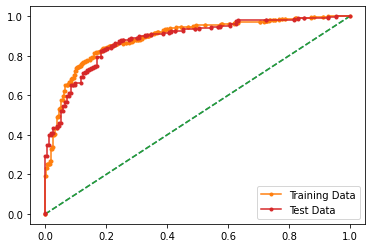

In [118]:
# AUC and ROC for the training data

# calculate AUC
LRB_train_auc = metrics.roc_auc_score(y_train,LRB_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % LRB_train_auc)

#  calculate roc curve
LRB_fpr_train, LRB_tpr_train, thresholds = metrics.roc_curve(y_train,LRB_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LRB_fpr_train, LRB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LRB_test_auc = metrics.roc_auc_score(y_test,LRB_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % LRB_test_auc)

#  calculate roc curve
LRB_fpr_test, LRB_tpr_test, thresholds = metrics.roc_curve(y_test,LRB_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LRB_fpr_test, LRB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### KNN Model Tuning

In [ ]:
KNNG=KNeighborsClassifier()

leaf_size =list(range(1, 50))
n_neighbors=list(range(1, 30))
p=[1, 2]

Hp = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)
KNN_grid = GridSearchCV(KNNG, Hp, cv=5)

In [120]:
KNN_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [121]:
print(KNN_grid.best_params_,'\n')
print(KNN_grid.best_estimator_)

{'leaf_size': 1, 'n_neighbors': 28, 'p': 1} 

KNeighborsClassifier(leaf_size=1, n_neighbors=28, p=1)


In [122]:
KNNGbest_model = KNN_grid.best_estimator_

In [123]:
#Prediction on the Training Set & Test Data Set
KNNB_ytrain_predict = KNNGbest_model.predict(X_train)
KNNB_ytest_predict = KNNGbest_model.predict(X_test)

In [124]:
## Getting the probabilites on the test set
KNNB_ytest_prob=KNNGbest_model.predict_proba(X_test)
KNNB_ytrain_prob=KNNGbest_model.predict_proba(X_train)
pd.DataFrame(KNNB_ytest_prob).head()

,0,1
0,0.571429,0.428571
1,0.142857,0.857143
2,0.000000,1.000000
3,0.857143,0.142857
4,0.071429,0.928571


In [125]:
# Accuracy - Training Data
KNNB_train_score = KNNGbest_model.score(X_train, y_train)
print('Accuracy Score is ',KNNB_train_score)

Accuracy Score is  0.8426013195098964


In [126]:
# Accuracy - Test Data
KNNB_test_score = KNNGbest_model.score(X_test, y_test)
print('Accuracy Score is ',KNNB_test_score)

Accuracy Score is  0.8223684210526315


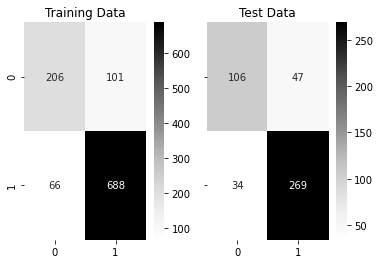

In [127]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,KNNB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,KNNB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [128]:
print('Classification Report of the training data:\n\n',classification_report(y_train, KNNB_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.67      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 



In [129]:
print('Classification Report of the test data:\n\n',classification_report(y_test,KNNB_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456
 



In [130]:
KNNB_metrics=classification_report(y_train,KNNB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(KNNB_metrics).transpose()
KNNB_train_f1=round(dfm.loc["1"][2],2)
KNNB_train_recall=round(dfm.loc["1"][1],2)
KNNB_train_precision=round(dfm.loc["1"][0],2)
print ('KNNB_train_precision ',KNNB_train_precision)
print ('KNNB_train_recall ',KNNB_train_recall)
print ('KNNB_train_f1 ',KNNB_train_f1)

KNNB_train_precision  0.87
KNNB_train_recall  0.91
KNNB_train_f1  0.89


In [131]:
KNNB_metrics=classification_report(y_test, KNNB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(KNNB_metrics).transpose()
KNNB_test_precision=round(dfm.loc["1"][0],2)
KNNB_test_recall=round(dfm.loc["1"][1],2)
KNNB_test_f1=round(dfm.loc["1"][2],2)
print ('KNNB_test_precision ',KNNB_test_precision)
print ('KNNB_test_recall ',KNNB_test_recall)
print ('KNNB_test_f1 ',KNNB_test_f1)

KNNB_test_precision  0.85
KNNB_test_recall  0.89
KNNB_test_f1  0.87


AUC for the Training Data: 0.904
AUC for the Test Data: 0.895


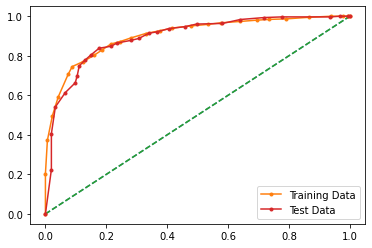

In [132]:
# AUC and ROC for the training data

# calculate AUC
KNNB_train_auc = metrics.roc_auc_score(y_train,KNNB_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % KNNB_train_auc)

#  calculate roc curve
KNNB_fpr_train, KNNB_tpr_train, thresholds = metrics.roc_curve(y_train,KNNB_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNNB_fpr_train, KNNB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
KNNB_test_auc = metrics.roc_auc_score(y_test,KNNB_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % KNNB_test_auc)

#  calculate roc curve
KNNB_fpr_test, KNNB_tpr_test, thresholds = metrics.roc_curve(y_test,KNNB_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNNB_fpr_test, KNNB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Bagging (RandomForest as base estimator)

In [133]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
param_grid ={
    'max_depth': [8, 9, 10],
    'max_features': [5, 6, 7, 8],
    'min_samples_leaf': [9,12,15],
    'n_estimators': [50, 100],
    'random_state': [1]
}
rfcl_grid = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)
rfcl_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [5, 6, 7, 8],
                         'min_samples_leaf': [9, 12, 15],
                         'n_estimators': [50, 100], 'random_state': [1]})

In [134]:
print(rfcl_grid.best_params_,'\n')
print(rfcl_grid.best_estimator_)
rfcl_model = rfcl_grid.best_estimator_

{'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 9, 'n_estimators': 50, 'random_state': 1} 

RandomForestClassifier(max_depth=9, max_features=6, min_samples_leaf=9,
                       n_estimators=50, random_state=1)


In [135]:
bgcl = BaggingClassifier(base_estimator=rfcl_model, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [136]:
#Prediction on the Training Set & Test Data Set
bgcl_ytrain_predict = bgcl.predict(X_train)
bgcl_ytest_predict = bgcl.predict(X_test)

In [137]:
## Getting the probabilites on the test set
bgcl_ytest_prob=bgcl.predict_proba(X_test)
bgcl_ytrain_prob=bgcl.predict_proba(X_train)
pd.DataFrame(bgcl_ytest_prob).head()

,0,1
0,0.543400,0.456600
1,0.215023,0.784977
2,0.010903,0.989097
3,0.761104,0.238896
4,0.212600,0.787400


In [138]:
# Accuracy - Training Data
bgcl_train_score = bgcl.score(X_train, y_train)
print('Accuracy Score is ',bgcl_train_score)

Accuracy Score is  0.8595664467483506


In [139]:
# Accuracy - Test Data
bgcl_test_score = bgcl.score(X_test, y_test)
print('Accuracy Score is ',bgcl_test_score)

Accuracy Score is  0.8223684210526315


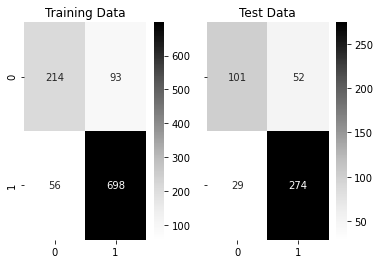

In [140]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,bgcl_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,bgcl_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [141]:
print('Classification Report of the training data:\n\n',classification_report(y_train, bgcl_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.79      0.70      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061
 



In [142]:
print('Classification Report of the test data:\n\n',classification_report(y_test,bgcl_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.78      0.66      0.71       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456
 



In [143]:
bgcl_metrics=classification_report(y_train,bgcl_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(bgcl_metrics).transpose()
bgcl_train_f1=round(dfm.loc["1"][2],2)
bgcl_train_recall=round(dfm.loc["1"][1],2)
bgcl_train_precision=round(dfm.loc["1"][0],2)
print ('bgcl_train_precision ',bgcl_train_precision)
print ('bgcl_train_recall ',bgcl_train_recall)
print ('bgcl_train_f1 ',bgcl_train_f1)

bgcl_train_precision  0.88
bgcl_train_recall  0.93
bgcl_train_f1  0.9


In [144]:
bgcl_metrics=classification_report(y_test, bgcl_ytest_predict,output_dict=True)
dfm=pd.DataFrame(bgcl_metrics).transpose()
bgcl_test_precision=round(dfm.loc["1"][0],2)
bgcl_test_recall=round(dfm.loc["1"][1],2)
bgcl_test_f1=round(dfm.loc["1"][2],2)
print ('bgcl_test_precision ',bgcl_test_precision)
print ('bgcl_test_recall ',bgcl_test_recall)
print ('bgcl_test_f1 ',bgcl_test_f1)

bgcl_test_precision  0.84
bgcl_test_recall  0.9
bgcl_test_f1  0.87


AUC for the Training Data: 0.922
AUC for the Test Data: 0.892


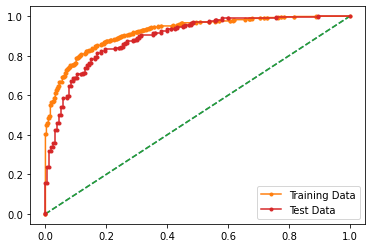

In [145]:
# AUC and ROC for the training data

# calculate AUC
bgcl_train_auc = metrics.roc_auc_score(y_train,bgcl_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % bgcl_train_auc)

#  calculate roc curve
bgcl_fpr_train, bgcl_tpr_train, thresholds = metrics.roc_curve(y_train,bgcl_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_fpr_train, bgcl_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
bgcl_test_auc = metrics.roc_auc_score(y_test,bgcl_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % bgcl_test_auc)

#  calculate roc curve
bgcl_fpr_test, bgcl_tpr_test, thresholds = metrics.roc_curve(y_test,bgcl_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_fpr_test, bgcl_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Ada Boost

In [146]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [147]:
#Prediction on the Training Set & Test Data Set
ADB_ytrain_predict = ADB_model.predict(X_train)
ADB_ytest_predict = ADB_model.predict(X_test)

In [148]:
## Getting the probabilites on the test set
ADB_ytest_prob=ADB_model.predict_proba(X_test)
ADB_ytrain_prob=ADB_model.predict_proba(X_train)
pd.DataFrame(ADB_ytest_prob).head()

,0,1
0,0.502173,0.497827
1,0.496755,0.503245
2,0.480057,0.519943
3,0.505525,0.494475
4,0.493868,0.506132


In [149]:
# Accuracy - Training Data
ADB_train_score = ADB_model.score(X_train, y_train)
print('Accuracy Score is ',ADB_train_score)

Accuracy Score is  0.8501413760603205


In [150]:
# Accuracy - Test Data
ADB_test_score = ADB_model.score(X_test, y_test)
print('Accuracy Score is ',ADB_test_score)

Accuracy Score is  0.8135964912280702


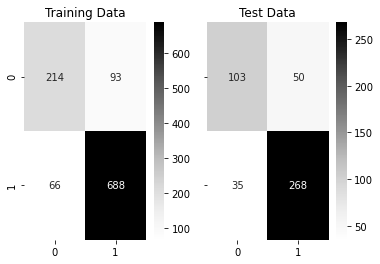

In [151]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ADB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ADB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [152]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ADB_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [153]:
print('Classification Report of the test data:\n\n',classification_report(y_test,ADB_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



In [154]:
ADB_metrics=classification_report(y_train,ADB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(ADB_metrics).transpose()
ADB_train_f1=round(dfm.loc["1"][2],2)
ADB_train_recall=round(dfm.loc["1"][1],2)
ADB_train_precision=round(dfm.loc["1"][0],2)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_precision  0.88
ADB_train_recall  0.91
ADB_train_f1  0.9


In [155]:
ADB_metrics=classification_report(y_test, ADB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(ADB_metrics).transpose()
ADB_test_precision=round(dfm.loc["1"][0],2)
ADB_test_recall=round(dfm.loc["1"][1],2)
ADB_test_f1=round(dfm.loc["1"][2],2)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_precision  0.84
ADB_test_recall  0.88
ADB_test_f1  0.86


AUC for the Training Data: 0.915
AUC for the Test Data: 0.877


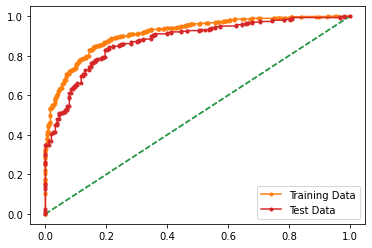

In [156]:
# AUC and ROC for the training data

# calculate AUC
ADB_train_auc = metrics.roc_auc_score(y_train,ADB_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % ADB_train_auc)

#  calculate roc curve
ADB_fpr_train, ADB_tpr_train, thresholds = metrics.roc_curve(y_train,ADB_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_fpr_train, ADB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ADB_test_auc = metrics.roc_auc_score(y_test,ADB_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % ADB_test_auc)

#  calculate roc curve
ADB_fpr_test, ADB_tpr_test, thresholds = metrics.roc_curve(y_test,ADB_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_fpr_test, ADB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Gradient Boosting

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [158]:
#Prediction on the Training Set & Test Data Set
gbcl_ytrain_predict = gbcl.predict(X_train)
gbcl_ytest_predict = gbcl.predict(X_test)

In [159]:
## Getting the probabilites on the test set
gbcl_ytest_prob=gbcl.predict_proba(X_test)
gbcl_ytrain_prob=gbcl.predict_proba(X_train)
pd.DataFrame(gbcl_ytest_prob).head()

,0,1
0,0.627549,0.372451
1,0.242376,0.757624
2,0.012862,0.987138
3,0.814551,0.185449
4,0.148756,0.851244


In [160]:
# Accuracy - Training Data
gbcl_train_score = gbcl.score(X_train, y_train)
print('Accuracy Score is ',gbcl_train_score)

Accuracy Score is  0.8803016022620169


In [161]:
# Accuracy - Test Data
gbcl_test_score = gbcl.score(X_test, y_test)
print('Accuracy Score is ',gbcl_test_score)

Accuracy Score is  0.8289473684210527


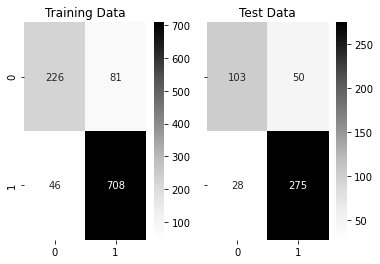

In [162]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,gbcl_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,gbcl_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [163]:
print('Classification Report of the training data:\n\n',classification_report(y_train, gbcl_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061
 



In [164]:
print('Classification Report of the test data:\n\n',classification_report(y_test,gbcl_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



In [165]:
gbcl_metrics=classification_report(y_train,gbcl_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(dfm.loc["1"][2],2)
gbcl_train_recall=round(dfm.loc["1"][1],2)
gbcl_train_precision=round(dfm.loc["1"][0],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  0.9
gbcl_train_recall  0.94
gbcl_train_f1  0.92


In [166]:
gbcl_metrics=classification_report(y_test, gbcl_ytest_predict,output_dict=True)
dfm=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(dfm.loc["1"][0],2)
gbcl_test_recall=round(dfm.loc["1"][1],2)
gbcl_test_f1=round(dfm.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.85
gbcl_test_recall  0.91
gbcl_test_f1  0.88


AUC for the Training Data: 0.935
AUC for the Test Data: 0.897


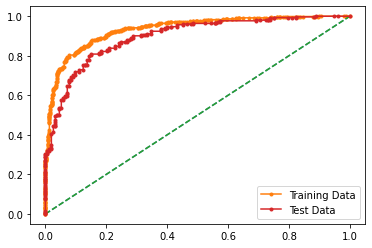

In [168]:
# AUC and ROC for the training data

# calculate AUC
gbcl_train_auc = metrics.roc_auc_score(y_train,gbcl_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % gbcl_train_auc)

#  calculate roc curve
gbcl_fpr_train, gbcl_tpr_train, thresholds = metrics.roc_curve(y_train,gbcl_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_fpr_train, gbcl_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gbcl_test_auc = metrics.roc_auc_score(y_test,gbcl_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % gbcl_test_auc)

#  calculate roc curve
gbcl_fpr_test, gbcl_tpr_test, thresholds = metrics.roc_curve(y_test,gbcl_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_fpr_test, gbcl_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Solution 1.7: Performance Metrics & Final Model Comparison 



In [171]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_train_score,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'LR Test':[LR_test_score,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
       'LDA Train':[LDA_train_score,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_score,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       'KNN Train':[KNN_train_score,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_score,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
         'NB Train':[NB_train_score,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_test_score,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
         'LRT Train':[LRB_train_score,LRB_train_auc,LRB_train_recall,LRB_train_precision,LRB_train_f1],
        'LRT Test':[LRB_test_score,LRB_test_auc,LRB_test_recall,LRB_test_precision,LRB_test_f1],
        'KNNT Train':[KNNB_train_score,KNNB_train_auc,KNNB_train_recall,KNNB_train_precision,KNNB_train_f1],
        'KNNT Test':[KNNB_test_score,KNNB_test_auc,KNNB_test_recall,KNNB_test_precision,KNNB_test_f1],
        'BAGGIBG Train':[bgcl_train_score,bgcl_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
        'BAGGIBG Test':[bgcl_test_score,bgcl_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
         'ADA Train':[ADB_train_score,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
        'ADA Test':[ADB_test_score,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
         'GB Train':[gbcl_train_score,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'GB Test':[gbcl_test_score,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
                    },index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,LRT Train,LRT Test,KNNT Train,KNNT Test,BAGGIBG Train,BAGGIBG Test,ADA Train,ADA Test,GB Train,GB Test
Accuracy,0.83,0.83,0.83,0.83,0.86,0.83,0.83,0.82,0.83,0.83,0.84,0.82,0.86,0.82,0.85,0.81,0.88,0.83
AUC,0.89,0.88,0.89,0.89,0.93,0.88,0.89,0.88,0.89,0.88,0.90,0.90,0.92,0.89,0.91,0.88,0.94,0.90
Recall,0.91,0.88,0.91,0.88,0.92,0.89,0.89,0.89,0.91,0.88,0.91,0.89,0.93,0.90,0.91,0.88,0.94,0.91
Precision,0.86,0.86,0.86,0.86,0.89,0.85,0.88,0.85,0.86,0.86,0.87,0.85,0.88,0.84,0.88,0.84,0.90,0.85
F1 Score,0.89,0.87,0.89,0.87,0.90,0.87,0.88,0.87,0.89,0.87,0.89,0.87,0.90,0.87,0.90,0.86,0.92,0.88


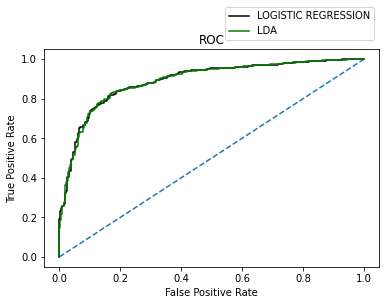

In [176]:
#ROC Curve for the 2 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_fpr_train, LR_tpr_train,color='black',label="LOGISTIC REGRESSION")
plt.plot(LDA_fpr_train,LDA_tpr_train,color='green',label="LDA")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

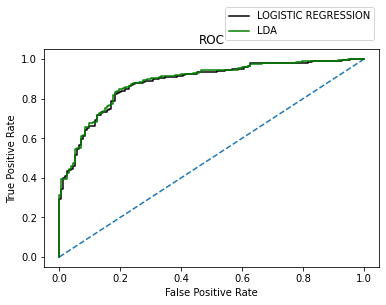

In [177]:
#ROC Curve for the 2 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_fpr_test, LR_tpr_test,color='black',label="LOGISTIC REGRESSION")
plt.plot(LDA_fpr_test,LDA_tpr_test,color='green',label="LDA")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

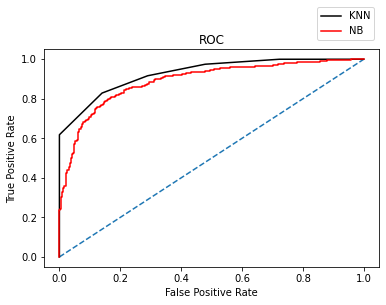

In [178]:
#ROC Curve for the 2 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(KNN_fpr_train, KNN_tpr_train,color='black',label="KNN")
plt.plot(NB_fpr_train,NB_tpr_train,color='red',label="NB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

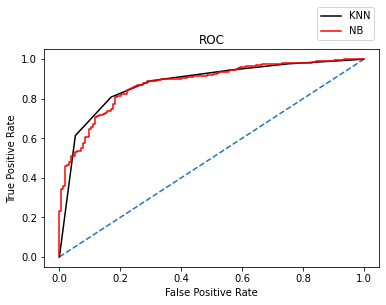

In [179]:
#ROC Curve for the 2 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(KNN_fpr_test, KNN_tpr_test,color='black',label="KNN")
plt.plot(NB_fpr_test,NB_tpr_test,color='red',label="NB")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

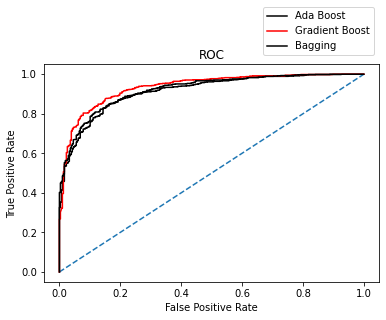

In [180]:
#ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ADB_fpr_train, ADB_tpr_train,color='black',label="Ada Boost")
plt.plot(gbcl_fpr_train,gbcl_tpr_train,color='red',label="Gradient Boost")
plt.plot(bgcl_fpr_train,bgcl_tpr_train,color='black',label="Bagging")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

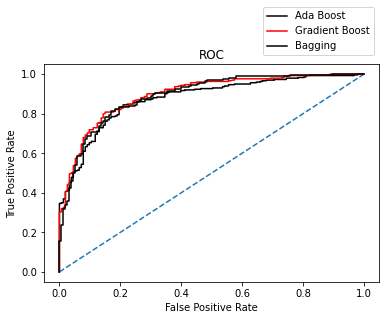

In [182]:
#ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ADB_fpr_test, ADB_tpr_test,color='black',label="Ada Boost")
plt.plot(gbcl_fpr_test,gbcl_tpr_test,color='red',label="Gradient Boost")
plt.plot(bgcl_fpr_test,bgcl_tpr_test,color='black',label="Bagging")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

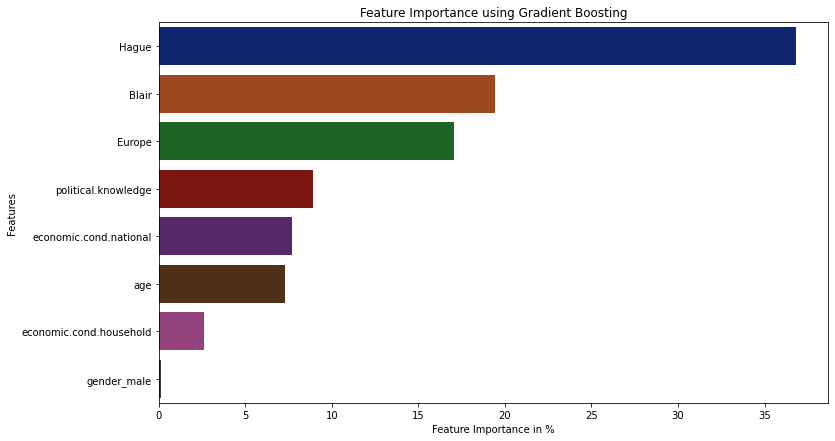

In [183]:
x=pd.DataFrame(gbcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Gradient Boosting')
plt.show()

## Problem Statement 2: Text Mining

In [187]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
R=inaugural.raw('1941-Roosevelt.txt')
K=inaugural.raw('1961-Kennedy.txt')
N=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\kirti\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


### Solution 2.1: Find the number of characters, words and sentences for the mentioned documents.

#### NO. of Characters, words and sentences for President Franklin D. Roosevelt in 1941

In [189]:
import random

import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kirti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [190]:
#Number of Characters

number_of_characters=len(R)
print('Number of Characters in Roosevelt Speech:', number_of_characters)

number_of_characters1=len(K)
print('Number of Characters in Kennedy:', number_of_characters1)

number_of_characters2=len(N)
print('Number of Characters in Nixon:', number_of_characters2)

Number of Characters in Roosevelt Speech: 7571
Number of Characters in Kennedy: 7618
Number of Characters in Nixon: 9991


In [191]:
#Number of Words
words = R.split()
print('Number of Words in Roosevelt Speech:', len(words))

words1 = K.split()
print('Number of Words in Kennedy Speech:', len(words1))

words2 = N.split()
print('Number of Words in Nixon Speech:', len(words2))

Number of Words in Roosevelt Speech: 1360
Number of Words in Kennedy Speech: 1390
Number of Words in Nixon Speech: 1819


In [192]:
#Number of Sentences
A = sent_tokenize(R)
print('Number of Sentences in Roosevelt Speech:', len(A))

B = sent_tokenize(K)
print('Number of Sentences in Kennedy Speech:', len(B))

C = sent_tokenize(N)
print('Number of Sentences in Nixon Speech:', len(C))

Number of Sentences in Roosevelt Speech: 68
Number of Sentences in Kennedy Speech: 52
Number of Sentences in Nixon Speech: 68


### Solution 2.2 : Remove all the stopwords from the three speeches.

In [214]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [209]:
#Removing all the Stopwords from Roosevelt Speeches
stopwords = set(stopwords.words('english'))
wordtoken = word_tokenize(R)

#all_words = (w.lower() for w in R.words())
all_word_clean = [word for word in wordtoken if word not in stopwords]
all_word_clean=[]

for w in wordtoken:
    if w not in stopwords:
        all_word_clean.append(w)
        
print('Word Token:',wordtoken)


 

Word Token: ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States.In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation.In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within.In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without.To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.', 'If', 'we', 'do', '

In [195]:
print(all_word_clean)

['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'come', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'man', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'men', 'doubt', '.', 'There', 'men', 'believe', 'democracy', ',', 'form', 'Government', 'fra

In [196]:
#Removing all the Stopwords from Kennedy Speeches
#stop_words = set(stopwords.words('english'))
stop_words = nltk.corpus.stopwords.words('english')
word_token = word_tokenize(K)

#all_words = (w.lower() for w in R.words())
all_word_clean = [word for word in word_token if word not in stop_words]
all_word_clean=[]

for w in word_token:
    if w not in stop_words:
        all_word_clean.append(w)
        
print('Word Token:',word_token)

Word Token: ['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revo

In [197]:
print(all_word_clean)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'observe', 'today', 'victory', 'party', ',', 'celebration', 'freedom', '--', 'symbolizing', 'end', ',', 'well', 'beginning', '--', 'signifying', 'renewal', ',', 'well', 'change', '.', 'For', 'I', 'sworn', 'I', 'Almighty', 'God', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', '.', 'The', 'world', 'different', '.', 'For', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', '.', 'And', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', '--', 'belief', 'rights', 'man', 'come', 'generosity', 'state', ',', 'hand', 'God', '.', 'We', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', '.', 'Let', '

In [198]:
#Removing all the Stopwords from Nixon Speeches
#stop_words = set(stopwords.words('english'))
stop_words1 = nltk.corpus.stopwords.words('english')
word_token1 = word_tokenize(N)

#all_words = (w.lower() for w in R.words())
all_word_clean1 = [word for word in word_token1 if word not in stop_words1]
all_word_clean1=[]

for w in word_token1:
    if w not in stop_words1:
        all_word_clean1.append(w)
        
print('Word Token:',word_token1)

Word Token: ['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolat

In [199]:
print(all_word_clean1)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', ':', 'When', 'met', 'four', 'years', 'ago', ',', 'America', 'bleak', 'spirit', ',', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', '.', 'As', 'meet', 'today', ',', 'stand', 'threshold', 'new', 'era', 'peace', 'world', '.', 'The', 'central', 'question', 'us', ':', 'How', 'shall', 'use', 'peace', '?', 'Let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', ':', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', '.', 'Let', 'us', 'resolve', 'become', ':', 'time', 'great', 'responsibilities', 'greatly', 'borne', ',', 'renew', 'spirit', 'promise', 'America', 'enter', 'third', 'century', 'nation', '.', 'This', 'past', 'year', 'saw', 'far-reaching', 'results', 'new', '

###  Solution 2.3: Word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [200]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [201]:
#Top 3 words from Roosevelt speech
tokenizer = RegexpTokenizer(r'\w+')
R_no_punctk = tokenizer.tokenize(R)
set(w.title() for w in R_no_punctk if w.lower() not in stopwords.words())
word_count = Counter(w.title() for w in R_no_punctk if w.lower() not in stopwords.words())
word_count.most_common()

[('Nation', 12),
 ('Know', 10),
 ('Spirit', 9),
 ('Life', 9),
 ('Democracy', 9),
 ('Us', 8),
 ('People', 7),
 ('America', 7),
 ('Years', 6),
 ('Freedom', 6),
 ('Human', 5),
 ('New', 5),
 ('Body', 5),
 ('Mind', 5),
 ('Speaks', 5),
 ('Day', 4),
 ('States', 4),
 ('Government', 4),
 ('Must', 4),
 ('Something', 4),
 ('Faith', 4),
 ('United', 3),
 ('Task', 3),
 ('Within', 3),
 ('History', 3),
 ('Nations', 3),
 ('Three', 3),
 ('Live', 3),
 ('Future', 3),
 ('Free', 3),
 ('Alone', 3),
 ('Still', 3),
 ('Every', 3),
 ('Continent', 3),
 ('Like', 3),
 ('Person', 3),
 ('World', 3),
 ('Sacred', 3),
 ('Came', 3),
 ('First', 3),
 ('Destiny', 3),
 ('National', 2),
 ('1789', 2),
 ('Sense', 2),
 ('Washington', 2),
 ('Create', 2),
 ('Together', 2),
 ('Disruption', 2),
 ('Without', 2),
 ('Time', 2),
 ('Midst', 2),
 ('Stock', 2),
 ('May', 2),
 ('Lives', 2),
 ('Little', 2),
 ('Measure', 2),
 ('Doubt', 2),
 ('Measured', 2),
 ('Americans', 2),
 ('True', 2),
 ('Republic', 2),
 ('Acted', 2),
 ('Security', 2),
 ('

In [202]:
#Top 3 words from kennedy speech
tokenizer = RegexpTokenizer(r'\w+')
K_no_punctk = tokenizer.tokenize(K)
set(w.title() for w in K_no_punctk if w.lower() not in stopwords.words())
word_count1 = Counter(w.title() for w in K_no_punctk if w.lower() not in stopwords.words())
word_count1.most_common()

[('Let', 16),
 ('Us', 12),
 ('World', 8),
 ('Sides', 8),
 ('New', 7),
 ('Pledge', 7),
 ('Citizens', 5),
 ('Power', 5),
 ('Shall', 5),
 ('Free', 5),
 ('Nations', 5),
 ('Ask', 5),
 ('President', 4),
 ('Fellow', 4),
 ('Freedom', 4),
 ('First', 4),
 ('Americans', 4),
 ('Peace', 4),
 ('Always', 4),
 ('Cannot', 4),
 ('Hope', 4),
 ('Help', 4),
 ('Arms', 4),
 ('Country', 4),
 ('Call', 4),
 ('Today', 3),
 ('Well', 3),
 ('God', 3),
 ('Human', 3),
 ('Poverty', 3),
 ('Life', 3),
 ('Globe', 3),
 ('Dare', 3),
 ('Go', 3),
 ('Generation', 3),
 ('Know', 3),
 ('Bear', 3),
 ('Control', 3),
 ('May', 3),
 ('Good', 3),
 ('Join', 3),
 ('Begin', 3),
 ('Never', 3),
 ('Final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('Forebears', 2),
 ('Century', 2),
 ('Hands', 2),
 ('Forms', 2),
 ('Yet', 2),
 ('Around', 2),
 ('Rights', 2),
 ('Hand', 2),
 ('Revolution', 2),
 ('Word', 2),
 ('Forth', 2),
 ('Time', 2),
 ('Friend', 2),
 ('Foe', 2),
 ('Passed', 2),
 ('Nation', 2),
 ('Committed', 2),
 ('Every', 2),
 ('Whether', 2),
 ('Burden'

In [203]:
#Top 3 words from Nixon speech
tokenizer = RegexpTokenizer(r'\w+')
N_no_punctk = tokenizer.tokenize(N)
set(w.title() for w in N_no_punctk if w.lower() not in stopwords.words())
word_count2 = Counter(w.title() for w in N_no_punctk if w.lower() not in stopwords.words())
word_count2.most_common()

[('Us', 26),
 ('Let', 22),
 ('America', 21),
 ('Peace', 19),
 ('World', 18),
 ('New', 15),
 ('Nation', 11),
 ('Responsibility', 11),
 ('Government', 10),
 ('Great', 9),
 ('Home', 9),
 ('Abroad', 8),
 ('Together', 7),
 ('Years', 7),
 ('Shall', 7),
 ('Policies', 7),
 ('Role', 7),
 ('Make', 7),
 ('Every', 7),
 ('History', 7),
 ('Better', 7),
 ('Time', 6),
 ('Right', 6),
 ('People', 6),
 ('Help', 6),
 ('Four', 5),
 ('Today', 5),
 ('Responsibilities', 5),
 ('Progress', 5),
 ('Respect', 5),
 ('Others', 5),
 ('Act', 5),
 ('Promise', 4),
 ('Long', 4),
 ('Work', 4),
 ('Freedom', 4),
 ('God', 4),
 ('Old', 4),
 ('Proud', 4),
 ('Faith', 4),
 ('Mr', 3),
 ('Country', 3),
 ('Share', 3),
 ('Resolve', 3),
 ('Retreat', 3),
 ('Greatly', 3),
 ('Century', 3),
 ('Nations', 3),
 ('Bold', 3),
 ('Another', 3),
 ('Future', 3),
 ('Forward', 3),
 ('Build', 3),
 ('Structure', 3),
 ('Live', 3),
 ('System', 3),
 ('Gladly', 3),
 ('Challenges', 3),
 ('Away', 3),
 ('Way', 3),
 ('Individual', 3),
 ('Ask', 3),
 ('Ashamed

### Solution 2.4:  Plot the word cloud of each of the three speeches

In [204]:
!pip install wordcloud

In [205]:

from wordcloud import WordCloud,STOPWORDS
import re


#### Word Cloud of Roosevelt Speech after Cleaning

Word Cloud for Roosevelt Speech (after cleaning)!


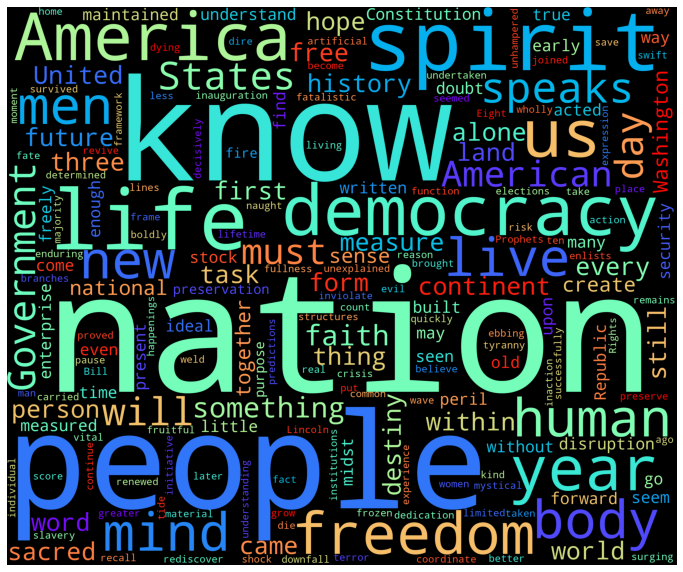

In [206]:

#Clean text
R = re.sub(r'==.*?==+,' ,'', R)
R = R.replace('\n', '')

#Define Function to plot wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='rainbow',
                      collocations = False,
                      width=3000,
                      height=2500,
                     ).generate(R)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
print("Word Cloud for Roosevelt Speech (after cleaning)!")
plt.show()

#### Word Cloud of Kennedy Speech after Cleaning

Word Cloud for Kennedy Speech (after cleaning)!


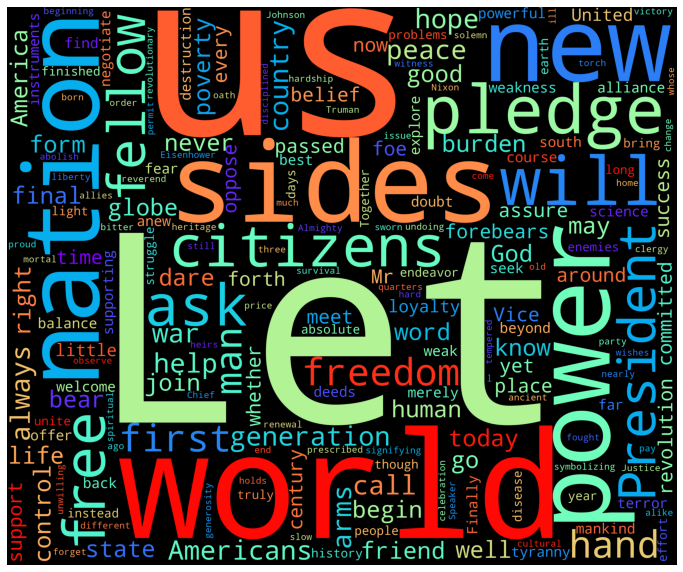

In [207]:
K = re.sub(r'==.*?==+,' ,'', K)
K = K.replace('\n', '')

#Define Function to plot wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='rainbow',
                      collocations = False,
                      width=3000,
                      height=2500,
                     ).generate(K)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
print("Word Cloud for Kennedy Speech (after cleaning)!")
plt.show()

#### Word Cloud of Nixon Speech after Cleaning

Word Cloud for Nixon Speech (after cleaning)!


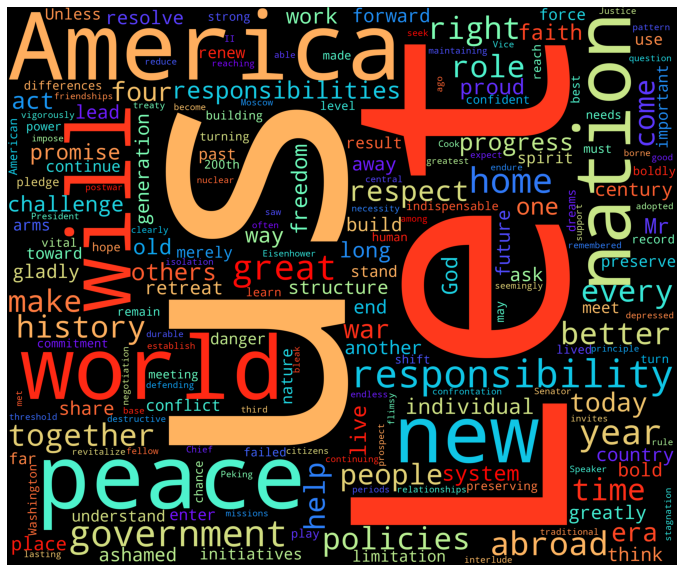

In [208]:
N = re.sub(r'==.*?==+,' ,'', N)
N = N.replace('\n', '')

#Define Function to plot wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='rainbow',
                      collocations = False,
                      width=3000,
                      height=2500,
                     ).generate(N)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
print("Word Cloud for Nixon Speech (after cleaning)!")
plt.show()